In [ ]:
pip install pyclustertend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 107.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from pyclustertend import hopkins
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances,silhouette_score

from numpy.random import uniform
from random import sample


In [ ]:
df=pd.read_csv("/content/wholesale+customers (1).zip")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.dropna()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
#Drop categorical identifiers: Channel, Region
df=df.drop(['Channel','Region'],axis=1)

In [ ]:
#Scaling
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [ ]:
#test for hopkins stats from package
df_hopkins=hopkins(df_scaled,df.shape[0])
print(f"Hopkins Statistic for  Dataset:{df_hopkins:.4f}")

round(df_hopkins,4)

Hopkins Statistic for  Dataset:0.0633


np.float64(0.0633)

In [ ]:
# Determine optimal K
sse_df = []
silhouette_df = []

In [ ]:
#Determine Optimal K Value with silhouette
silhouette_df = [] # Reset the list before the loop
for K in range(2,11):
  kmeans=KMeans(n_clusters=K,random_state=42,n_init='auto')
  kmeans.fit(df_scaled)
  silhouette_df.append(silhouette_score(df_scaled,kmeans.labels_))

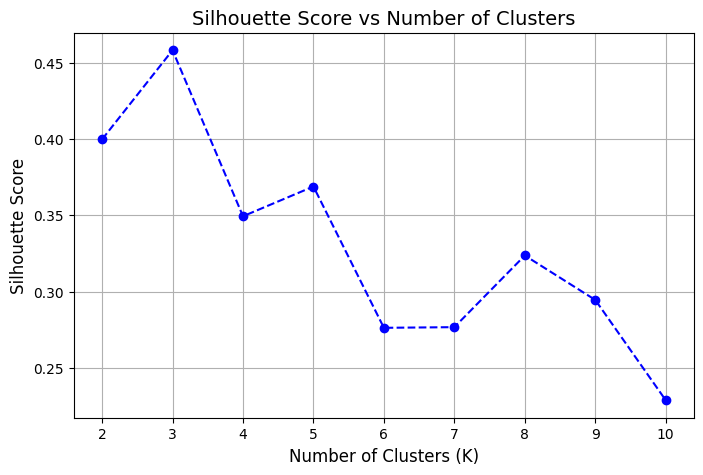

In [ ]:
#Plot the graph for  silhouette score
K_values = range(2, 11)

plt.figure(figsize=(8, 5))
plt.plot(K_values, silhouette_df, marker='o', linestyle='--', color='b')
plt.xticks(K_values)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.grid(True)
plt.show()



In [ ]:
optimal_k=np.argmax(silhouette_df)+2
print("Optimal number for clusters:",optimal_k)

Optimal number for clusters: 3


In [ ]:
#kmeans with k=3
kmeans=KMeans(n_clusters=3,random_state=42,n_init='auto')
kmeans.fit(df_scaled)
#add cluster labels to data frame
df['Features_clusters']=kmeans.labels_

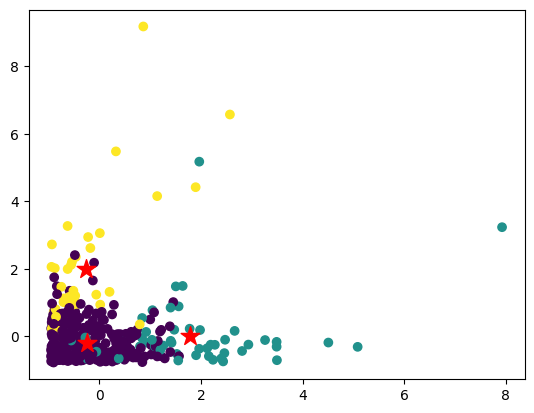

In [ ]:
#visualise clusters
plt.scatter(df_scaled[:,0],df_scaled[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=200)
plt.show()

In [ ]:
#print finals clusters
#print final cluster
print("\nWholesale Customers Dataset with assigned clusters:\n")
print(df.to_string(index=False))


Wholesale Customers Dataset with assigned clusters:

 Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Features_clusters
 12669  9656     7561     214              2674        1338                  0
  7057  9810     9568    1762              3293        1776                  0
  6353  8808     7684    2405              3516        7844                  0
 13265  1196     4221    6404               507        1788                  0
 22615  5410     7198    3915              1777        5185                  1
  9413  8259     5126     666              1795        1451                  0
 12126  3199     6975     480              3140         545                  0
  7579  4956     9426    1669              3321        2566                  0
  5963  3648     6192     425              1716         750                  0
  6006 11093    18881    1159              7425        2098                  0
  3366  5403    12974    4400              5977        1744                  

In [ ]:
#---------------------------------------------------------------------------------x-----------------------x-----------------------------------x----------------------------------------------

KMEOIDS

Calculating clusters:  56%|█████▌    | 5/9 [00:00<00:00, 42.59it/s]

Number of clusters: 2, Silhouette score: 0.40847625085909217
Number of clusters: 3, Silhouette score: 0.24873533314674529
Number of clusters: 4, Silhouette score: 0.3465054871030349
Number of clusters: 5, Silhouette score: 0.15653395699823322
Number of clusters: 6, Silhouette score: 0.1671733671851515
Number of clusters: 7, Silhouette score: 0.11690567141430361
Number of clusters: 8, Silhouette score: 0.17672034042151302


Calculating clusters: 100%|██████████| 9/9 [00:00<00:00, 34.01it/s]


Number of clusters: 9, Silhouette score: 0.16078767807626293
Number of clusters: 10, Silhouette score: 0.10860506963233961


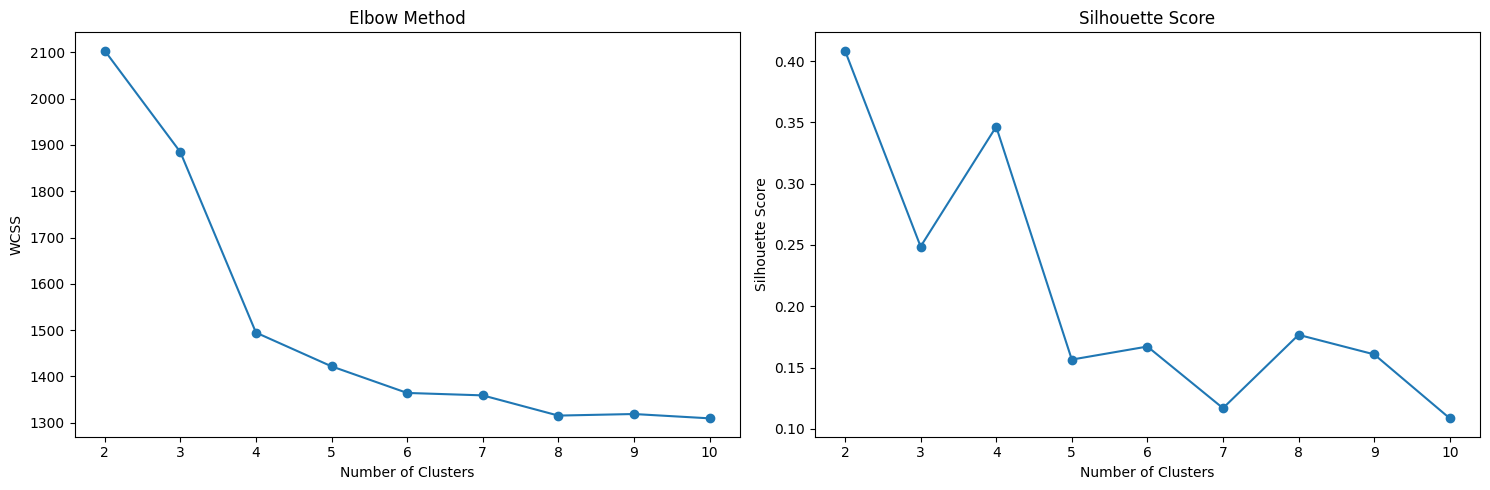

In [ ]:
#Make kmedoids function
class KMedoids:
    def __init__(self, n_clusters=3, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
    def fit(self, X):
        np.random.seed(self.random_state)

        #Step 1: Initialize random select k medoids
        n_samples = X.shape[0]
        self.medoids=np.random.choice(n_samples, self.n_clusters, replace=False)

        for _ in range(self.max_iter):
          #Step 2: Assign each point to the closest medoids
          distances = pairwise_distances(X, X[self.medoids])
          self.labels_=np.argmin(distances, axis=1)

          #Step 3: Update medoids
          new_medoids=[]
          for i in range(self.n_clusters):
            cluster_points=X[self.labels_==i]
            distances_in_cluster=pairwise_distances(cluster_points)
            total_distances=np.sum(distances_in_cluster, axis=1)
            new_medoid_idx=np.argmin(total_distances)   #Find point with smallest total distance
            #get the original index of the new medoids
            original_idx=np.where((X==cluster_points[new_medoid_idx]).all(axis=1))[0][0]
            new_medoids.append(original_idx) #append to list

          new_medoids=np.array(new_medoids)

          #check for convergence
          if np.array_equal(self.medoids, new_medoids):
            break

          self.medoids=new_medoids
        self.cluster_centers_=X[self.medoids]
        return self

    #Predict function
    def predict(self, X):
        distances=pairwise_distances(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

#elbow method to find the optimal number of cluster
wcss=[]
silhouette_scores=[]
range_n_clusters=range(2,11)

for n_clusters in tqdm(range_n_clusters, desc="Calculating clusters"):
  kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
  cluster_labels=kmedoids.fit(df_scaled).labels_


  #Calculate distances
  distances=pairwise_distances(df_scaled, kmedoids.cluster_centers_)
  wcss.append(np.sum(distances[np.arange(df_scaled.shape[0]), cluster_labels]**2))

  #Silhoutte score
  silhouette_avg=silhouette_score(df_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"Number of clusters: {n_clusters}, Silhouette score: {silhouette_avg}")


#plotting
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()




Optimal number of clusters: 2


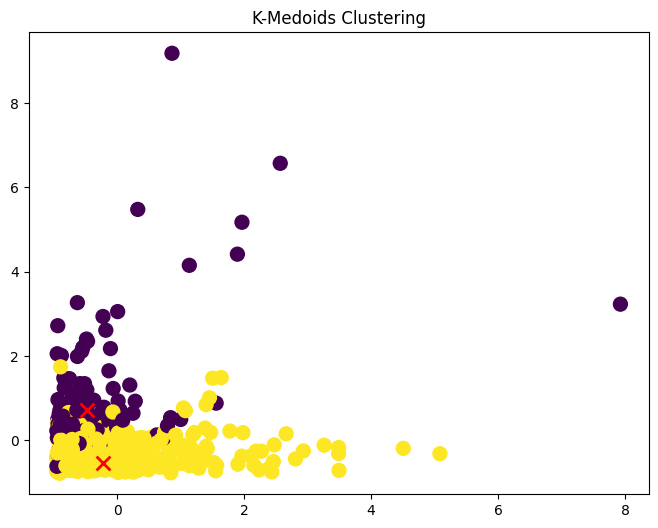

In [ ]:
#visualizing
optimal_k=range_n_clusters[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters: {optimal_k}")

kmedoids=KMedoids(n_clusters=optimal_k, random_state=42).fit(df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=kmedoids.labels_, cmap='viridis',s=100)
plt.scatter(kmedoids.cluster_centers_[:,0], kmedoids.cluster_centers_[:,1], c='red', marker='x', s=100, linewidths=2)
plt.title("K-Medoids Clustering")
plt.show()